In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# profiling packages
from ydata_profiling import ProfileReport

# modeling packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, accuracy_score

# helper functions
from modeling_help import evaluate_model

In [4]:
# college football data
odds_df = pd.read_csv('data/Package Sample 20240511/ncaaf_game_scores_1g_2022_sample.csv')
odds_df.head(20)

,season,date,away_team,away_score,away_point_spread,away_point_spread_line,away_money_line,home_team,home_score,home_point_spread,home_point_spread_line,home_money_line,over_under,over_line,under_line
0,2022-23,2022-08-27,austin_peay,27,27.5,-112,0.0,western_kentucky,38,-27.5,-112,0.0,64.5,-109,-109
1,2022-23,2022-08-27,northwestern,31,11.0,-110,350.0,nebraska,28,-11.0,-110,-439.0,52.0,-110,-110
2,2022-23,2022-08-27,wyoming,6,14.0,-110,430.0,illinois,38,-14.0,-110,-550.0,43.0,-110,-110
3,2022-23,2022-08-27,idaho_state,21,23.0,-112,0.0,unlv,52,-23.0,-112,0.0,52.5,-109,-109
4,2022-23,2022-08-27,sf_austin,17,-6.5,-125,0.0,jacksonville_state,42,6.5,-105,0.0,51.5,-112,-112
5,2022-23,2022-08-27,connecticut,20,26.5,-110,1792.0,utah_state,31,-26.5,-110,-4615.0,59.5,-110,-110
6,2022-23,2022-08-27,duquesne,7,43.5,-105,0.0,florida_state,47,-43.5,-125,0.0,54.5,-112,-112
7,2022-23,2022-08-27,charlotte_u,13,7.0,-110,235.0,florida_atlantic,43,-7.0,-110,-275.0,59.0,-110,-110
8,2022-23,2022-08-27,florida_a&m,24,42.5,-109,0.0,north_carolina,56,-42.5,-114,0.0,55.5,-115,-115
9,2022-23,2022-08-27,north_texas,31,-1.5,-110,-122.0,utep,13,1.5,-110,102.0,54.5,-110,-110


In [5]:
odds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   season                  1224 non-null   object 
 1   date                    1224 non-null   object 
 2   away_team               1224 non-null   object 
 3   away_score              1224 non-null   int64  
 4   away_point_spread       1224 non-null   object 
 5   away_point_spread_line  1224 non-null   int64  
 6   away_money_line         1224 non-null   float64
 7   home_team               1224 non-null   object 
 8   home_score              1224 non-null   int64  
 9   home_point_spread       1224 non-null   float64
 10  home_point_spread_line  1224 non-null   int64  
 11  home_money_line         1224 non-null   float64
 12  over_under              1224 non-null   float64
 13  over_line               1224 non-null   int64  
 14  under_line              1224 non-null   

In [6]:
print(odds_df.season.value_counts())

season
2022-23    1224
Name: count, dtype: int64


## rough modeling just to understand predictive power

In [7]:
# drop columns
drop_cols = ['season', 'date']
odds_df.drop(drop_cols, axis=1, inplace=True)

odds_df.head()

,away_team,away_score,away_point_spread,away_point_spread_line,away_money_line,home_team,home_score,home_point_spread,home_point_spread_line,home_money_line,over_under,over_line,under_line
0,austin_peay,27,27.5,-112,0.0,western_kentucky,38,-27.5,-112,0.0,64.5,-109,-109
1,northwestern,31,11.0,-110,350.0,nebraska,28,-11.0,-110,-439.0,52.0,-110,-110
2,wyoming,6,14.0,-110,430.0,illinois,38,-14.0,-110,-550.0,43.0,-110,-110
3,idaho_state,21,23.0,-112,0.0,unlv,52,-23.0,-112,0.0,52.5,-109,-109
4,sf_austin,17,-6.5,-125,0.0,jacksonville_state,42,6.5,-105,0.0,51.5,-112,-112


In [8]:
# get unique values for away_team and home_team and put into 1 list
teams = list(odds_df.away_team.unique()) + list(odds_df.home_team.unique())
teams = list(set(teams))

# create a dictionary with team names as keys and values as integers
team_dict = {team: i for i, team in enumerate(teams)}

# map the team names to the integers
odds_df['away_team'] = odds_df['away_team'].map(team_dict)
odds_df['home_team'] = odds_df['home_team'].map(team_dict)
odds_df.head()

,away_team,away_score,away_point_spread,away_point_spread_line,away_money_line,home_team,home_score,home_point_spread,home_point_spread_line,home_money_line,over_under,over_line,under_line
0,17,27,27.5,-112,0.0,132,38,-27.5,-112,0.0,64.5,-109,-109
1,1,31,11.0,-110,350.0,61,28,-11.0,-110,-439.0,52.0,-110,-110
2,214,6,14.0,-110,430.0,121,38,-14.0,-110,-550.0,43.0,-110,-110
3,86,21,23.0,-112,0.0,215,52,-23.0,-112,0.0,52.5,-109,-109
4,44,17,-6.5,-125,0.0,105,42,6.5,-105,0.0,51.5,-112,-112


In [15]:
# create a new column for the target variable as a binary outcome 1 for home team win and 0 for away team win
odds_df['target_money_line'] = odds_df['home_score'] > odds_df['away_score']
odds_df['target_money_line'] = odds_df['target_money_line'].astype(int)

## create targets for spread - we could predict a classification problem where we predict if the home team will cover the spread 
## or not or we could also train a model on the spread that actually happened and create a regressor model that will predict the spread itself
odds_df['target_spread_home_result_calc'] = odds_df['home_score'] - odds_df['away_score']

## this target column would be saying that the home team covered their spread prediction
odds_df['target_spread'] = (odds_df['target_spread_home_result_calc'] > abs(odds_df['home_point_spread'])) & (odds_df['home_point_spread'] < 0)
odds_df['target_spread'] = odds_df['target_spread'].astype(int)

odds_df['over_under_result'] = odds_df['home_score'] + odds_df['away_score']
odds_df['target_over_under'] = odds_df['over_under_result'] > odds_df['over_under']
odds_df['target_over_under'] = odds_df['target_over_under'].astype(int)

odds_df.head()

,away_team,away_score,away_point_spread,away_point_spread_line,away_money_line,home_team,home_score,home_point_spread,home_point_spread_line,home_money_line,over_under,over_line,under_line,target_money_line,target_spread_result_calc,over_under_result,target_over_under,target_spread_home_result_calc,target_spread
0,17,27,27.5,-112,0.0,132,38,-27.5,-112,0.0,64.5,-109,-109,1,11,65,1,11,0
1,1,31,11.0,-110,350.0,61,28,-11.0,-110,-439.0,52.0,-110,-110,0,3,59,1,-3,0
2,214,6,14.0,-110,430.0,121,38,-14.0,-110,-550.0,43.0,-110,-110,1,32,44,1,32,1
3,86,21,23.0,-112,0.0,215,52,-23.0,-112,0.0,52.5,-109,-109,1,31,73,1,31,1
4,44,17,-6.5,-125,0.0,105,42,6.5,-105,0.0,51.5,-112,-112,1,25,59,1,25,0


In [12]:
# check if there is ever a tie
odds_df[odds_df['home_score'] == odds_df['away_score']]

,away_team,away_score,away_point_spread,away_point_spread_line,away_money_line,home_team,home_score,home_point_spread,home_point_spread_line,home_money_line,over_under,over_line,under_line,target_money_line,target_spread_result_calc,over_under_result,target_over_under


In [13]:
# find where away_point_spread == to 'PK'. Found this error down below
odds_df[odds_df['away_point_spread'] == 'PK']

,away_team,away_score,away_point_spread,away_point_spread_line,away_money_line,home_team,home_score,home_point_spread,home_point_spread_line,home_money_line,over_under,over_line,under_line,target_money_line,target_spread_result_calc,over_under_result,target_over_under
841,68,24,PK,-108,-108.0,36,21,2.5,-109,108.0,49.0,-105,-110,0,3,45,False
1058,163,27,PK,-110,-110.0,142,42,2.5,-120,100.0,66.5,-110,-109,1,15,69,True
1146,113,42,PK,-110,-110.0,89,52,1.5,-110,-108.0,75.5,-109,-110,1,10,94,True


In [40]:
# where away_point_spread == 'PK' set to the opposite of home_point_spread
odds_df.loc[odds_df['away_point_spread'] == 'PK', 'away_point_spread'] = odds_df['home_point_spread'] * -1
odds_df['away_point_spread'] = odds_df['away_point_spread'].astype(float)

# show odds_df at index 841, 1058, and 1146
odds_df.loc[[841, 1058, 1146]]

,away_team,away_score,away_point_spread,away_point_spread_line,away_money_line,home_team,home_score,home_point_spread,home_point_spread_line,home_money_line,over_under,over_line,under_line,target
841,34,24,-2.5,-108,-108.0,259,21,2.5,-109,108.0,49.0,-105,-110,0
1058,254,27,-2.5,-110,-110.0,10,42,2.5,-120,100.0,66.5,-110,-109,1
1146,134,42,-1.5,-110,-110.0,82,52,1.5,-110,-108.0,75.5,-109,-110,1


In [55]:
# remove home score and away score columns and store into a new dataframe
df_model_ready = odds_df.drop(['home_score', 'away_score'], axis=1)

# create x and y variables
X = df_model_ready.drop('target', axis=1)
y = df_model_ready['target']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train.head()

### logistic regression

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Model Evaluation on Test Data:
Accuracy: 0.726530612244898
ROC AUC Score: 0.7044779286926994
[[ 57  36]
 [ 31 121]]
              precision    recall  f1-score   support

           0       0.65      0.61      0.63        93
           1       0.77      0.80      0.78       152

    accuracy                           0.73       245
   macro avg       0.71      0.70      0.71       245
weighted avg       0.72      0.73      0.72       245



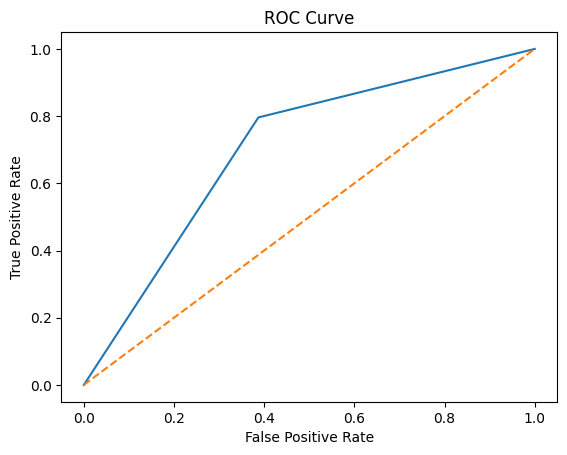

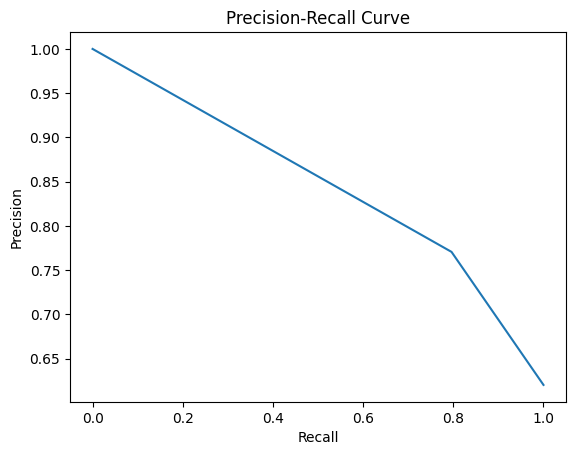

Model Evaluation on Train Data: Want to see how this may be overfitting...
Accuracy: 0.7323799795709908
ROC AUC Score: 0.7157450631453159
[[251 155]
 [107 466]]
              precision    recall  f1-score   support

           0       0.70      0.62      0.66       406
           1       0.75      0.81      0.78       573

    accuracy                           0.73       979
   macro avg       0.73      0.72      0.72       979
weighted avg       0.73      0.73      0.73       979



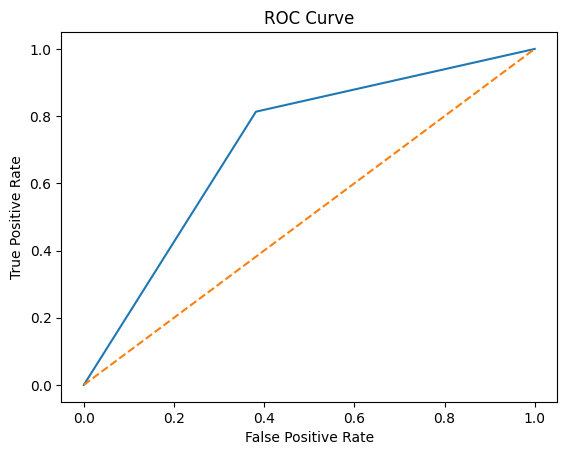

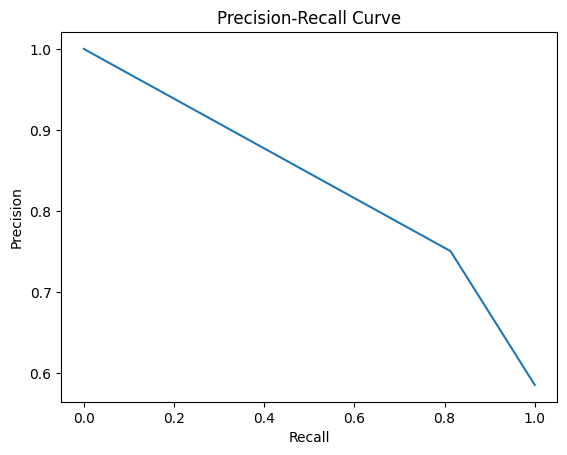

In [63]:
# create a logistic regression model
# log_reg_model = LogisticRegression()

# perform hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

# create a dictionary of hyperparameters
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear']}
# create a grid search object
grid_log_reg = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='roc_auc')

# fit the grid search object to the training data
grid_log_reg.fit(X_train, y_train)

# get the best hyperparameters
print(grid_log_reg.best_params_)

# create a logistic regression model with the best hyperparameters from grid_log_reg.best_params_
log_reg_model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

# use evaluate_model function to evaluate the model
accuracy_log_reg, roc_auc_score_var_log_reg, conf_matrix_log_reg, class_report_log_reg, fpr_log_reg, tpr_log_reg, precision_log_reg, recall_log_reg = evaluate_model(log_reg_model, X_train, y_train, X_test, y_test)

### random forest classifier

Model Evaluation on Test Data:
Accuracy: 0.726530612244898
ROC AUC Score: 0.7128254102999434
[[ 61  32]
 [ 35 117]]
              precision    recall  f1-score   support

           0       0.64      0.66      0.65        93
           1       0.79      0.77      0.78       152

    accuracy                           0.73       245
   macro avg       0.71      0.71      0.71       245
weighted avg       0.73      0.73      0.73       245



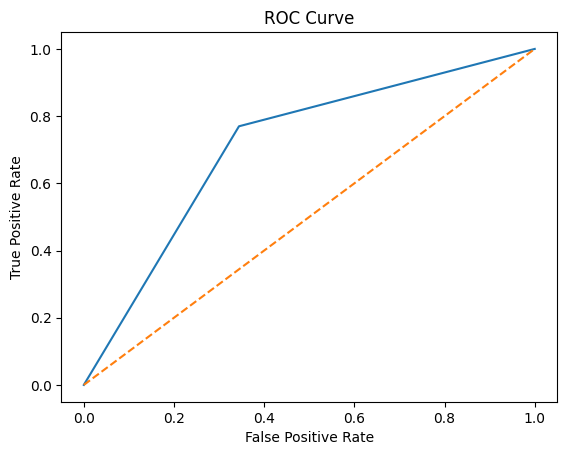

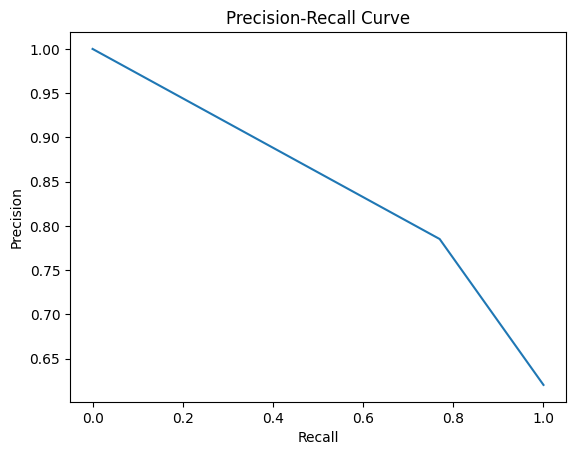

Model Evaluation on Train Data: Want to see how this may be overfitting...
Accuracy: 0.7732379979570991
ROC AUC Score: 0.7646472201446024
[[290 116]
 [106 467]]
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       406
           1       0.80      0.82      0.81       573

    accuracy                           0.77       979
   macro avg       0.77      0.76      0.77       979
weighted avg       0.77      0.77      0.77       979



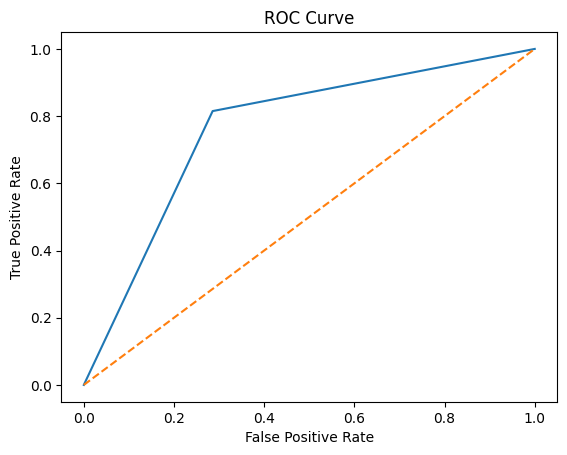

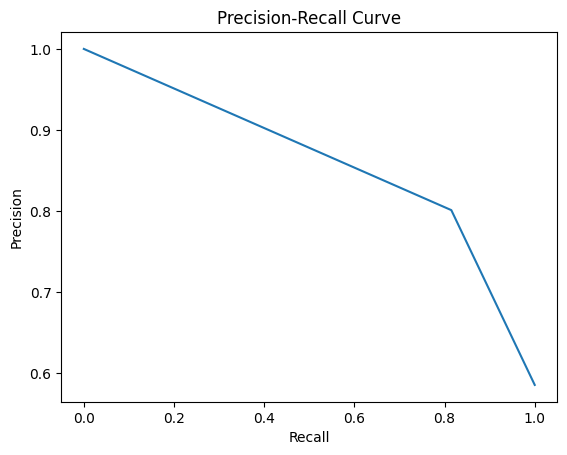

In [54]:
# can you run the same analysis as above but using a random forest classifier?
from sklearn.ensemble import RandomForestClassifier

# create a random forest classifier
# rf_model = RandomForestClassifier() -- overfitting very badly

# perform hyperparameter tuning using grid search
from sklearn.model_selection import GridSearchCV

# create a dictionary of hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# create a grid search object
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, n_jobs=-1)

# fit the grid search object to the data
grid_search.fit(X_train, y_train)

# get the best hyperparameters
grid_search.best_params_

# create a random forest classifier with the best hyperparameters
rf_model = RandomForestClassifier(**grid_search.best_params_)

accuracy_rf, roc_auc_score_var_rf, conf_matrix_rf, class_report_rf, fpr_rf, tpr_rf, precision_rf, recall_rf = evaluate_model(rf_model, X_train, y_train, X_test, y_test)

### lgb classifier

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 573, number of negative: 406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1367
[LightGBM] [Info] Number of data points in the train set: 979, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.585291 -> initscore=0.344533
[LightGBM] [Info] Start training from score 0.344533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

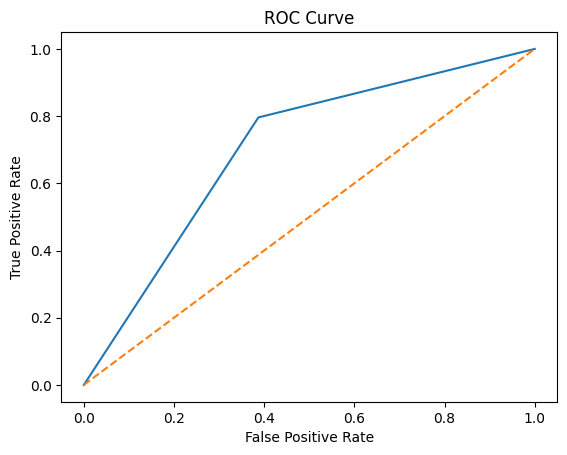

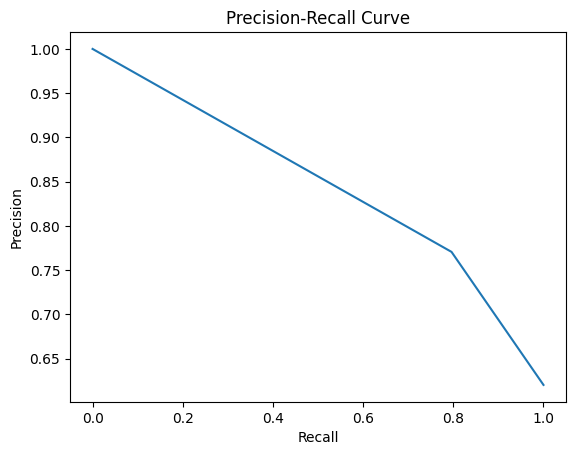

Model Evaluation on Train Data: Want to see how this may be overfitting...
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Accuracy: 0.7967313585291114
ROC AUC Score: 0.7861527351507492
[[294 112]
 [ 87 486]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.75       406
           1       0.81      0.85      0.83       573

    accuracy                           0.80       979
   macro avg       0.79      0.79      0.79       979
weighted avg       0.80      0.80      0.80       979



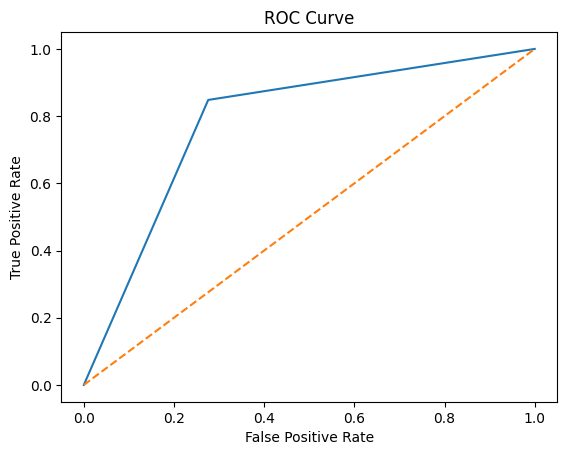

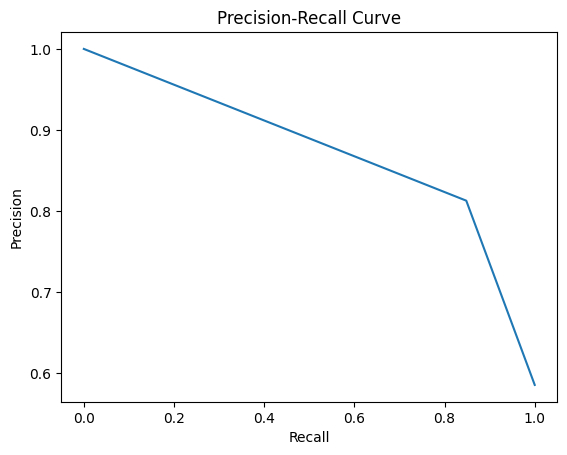

In [65]:
# run same analysis as above but with lightgbm
from lightgbm import LGBMClassifier

# # create a lightgbm classifier
# lgbm_model = LGBMClassifier()

# perform hyperparameter tuning using grid search
from sklearn.model_selection import GridSearchCV

# create a dictionary of hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 1]
}

# create a grid search object
grid_search = GridSearchCV(LGBMClassifier(), param_grid, cv=3, n_jobs=-1)

# fit the grid search object to the data
grid_search.fit(X_train, y_train)

# get the best hyperparameters
grid_search.best_params_

# create a lightgbm classifier with the best hyperparameters
lgbm_model = LGBMClassifier(**grid_search.best_params_)
accuracy_lgbm, roc_auc_score_var_lgbm, conf_matrix_lgbm, class_report_lgbm, fpr_lgbm, tpr_lgbm, precision_lgbm, recall_lgbm = evaluate_model(lgbm_model, X_train, y_train, X_test, y_test)